# 2D Convolution (Image Filtering)

As in one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. LPF helps in removing noise, blurring images, etc. HPF filters help in finding edges in images.

OpenCV provides a function cv.filter2D() to convolve a kernel with an image.

Reference: https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

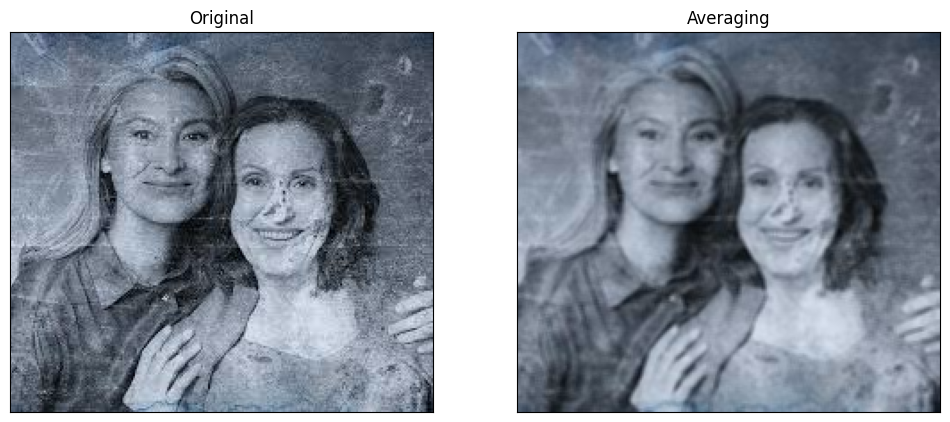

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 6))

img = cv.imread('./assets/old_image.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
kernel_size = 3
kernel = np.ones((kernel_size,kernel_size),np.float32)/(kernel_size**2)
dst = cv.filter2D(img,-1,kernel)
 
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# Image Blurring (Image Smoothening)

Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation (there are also blurring techniques which don't blur the edges).

- We will discuss 4 different main types of blurring technique provided by the OpenCV. Lets First Visualize them!!

### 1. Averaging
- This is done by convolving an image with a normalized box filter. It simply takes the average of all the pixels under the kernel area and replaces the central element. 

### 2. Gaussian blurring
- In this method, instead of a box filter, a Gaussian kernel is used. It is done with the function, `cv.GaussianBlur()`. We should specify the width and height of the kernel which should be positive and odd

### 3. Median blurring
- Here, the function `cv.medianBlur()` takes the median of all the pixels under the kernel area and the central element is replaced with this median value. This is highly effective against salt-and-pepper noise in an image. Interestingly, in the above filters, the central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, the central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

### 4. Bilateral Filtering
- `cv.bilateralFilter()` is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. We already saw that a Gaussian filter takes the neighbourhood around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn't consider whether pixels have almost the same intensity. It doesn't consider whether a pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.

- Bilateral filtering also takes a Gaussian filter in space, but one more Gaussian filter which is a function of pixel difference. The Gaussian function of space makes sure that only nearby pixels are considered for blurring, while the Gaussian function of intensity difference makes sure that only those pixels with similar intensities to the central pixel are considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

- Parameters guide: https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed

Reference: https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

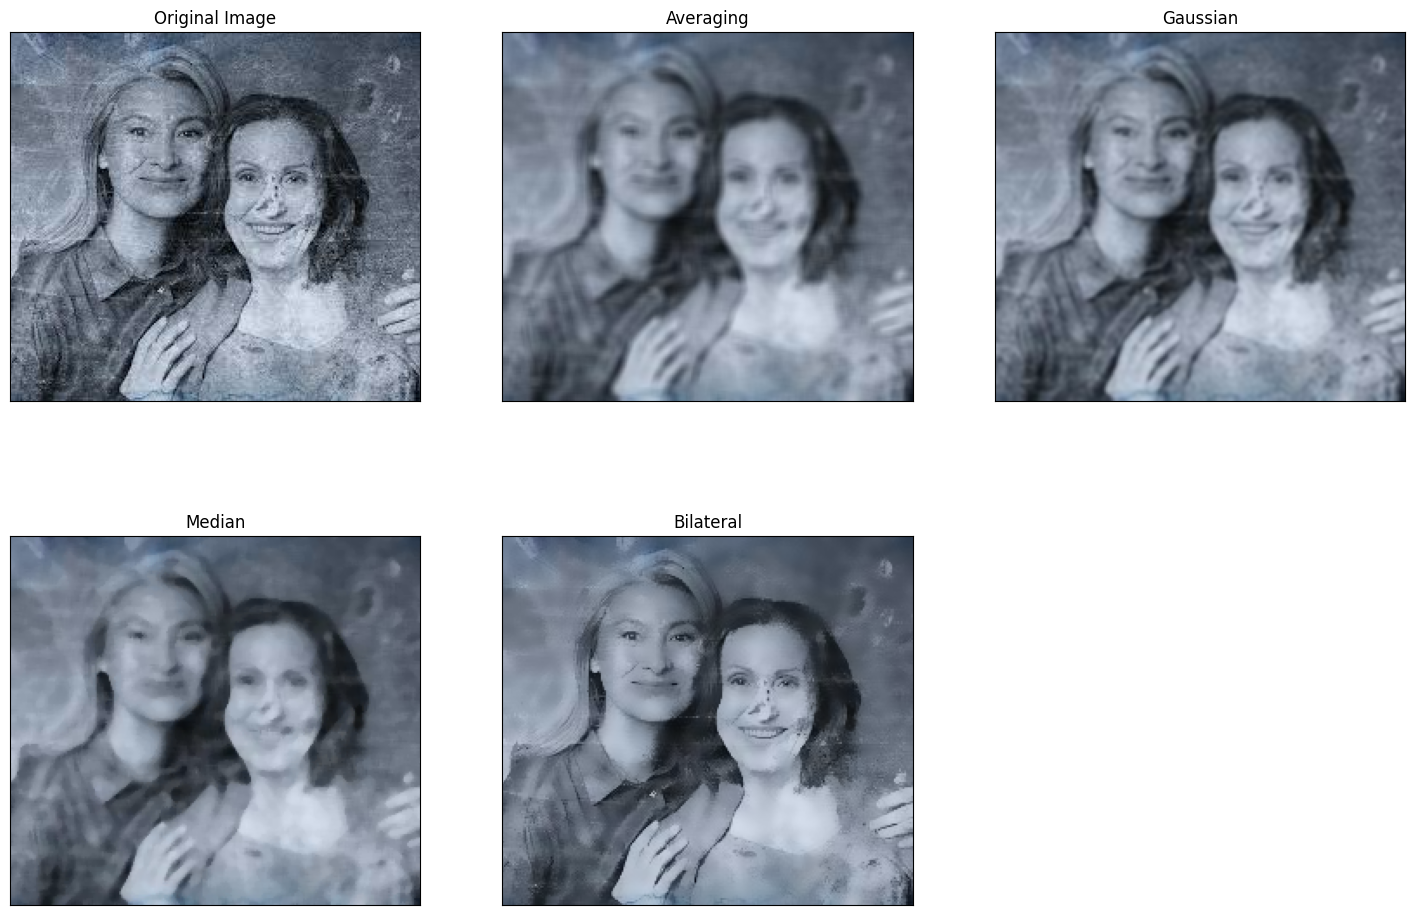

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(18, 12))

img = cv.imread('./assets/old_image.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"

kernel_size = 5
blur = cv.blur(img,(kernel_size,kernel_size))
gaussian = cv.GaussianBlur(img,(kernel_size,kernel_size),0)
median = cv.medianBlur(img,kernel_size)
bilateral = cv.bilateralFilter(img,9,75,75)

titles = ['Original Image','Averaging','Gaussian','Median','Bilateral']
images = [img, blur, gaussian, median, bilateral]
 
for i in range(len(titles)):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
 
plt.show()

## Averaging

Averaging, also known as mean blurring, computes the average of all the pixel values within the kernel and replaces the central pixel with this average.
This results in smoothing the image but can cause loss of detail.

The key parameter is the size of the kernel (e.g., (3,3), (5,5)) that determines the level of smoothing.

---

## Median Blurring

Median Blurring replaces the central pixel in the kernel with the median of all the pixel values in the kernel.
It is effective at removing "salt-and-pepper" noise from images.

The key parameter for median blur is the size of the kernel, which must always be an odd number.

Let's compare different kernel sizes for both methods below:

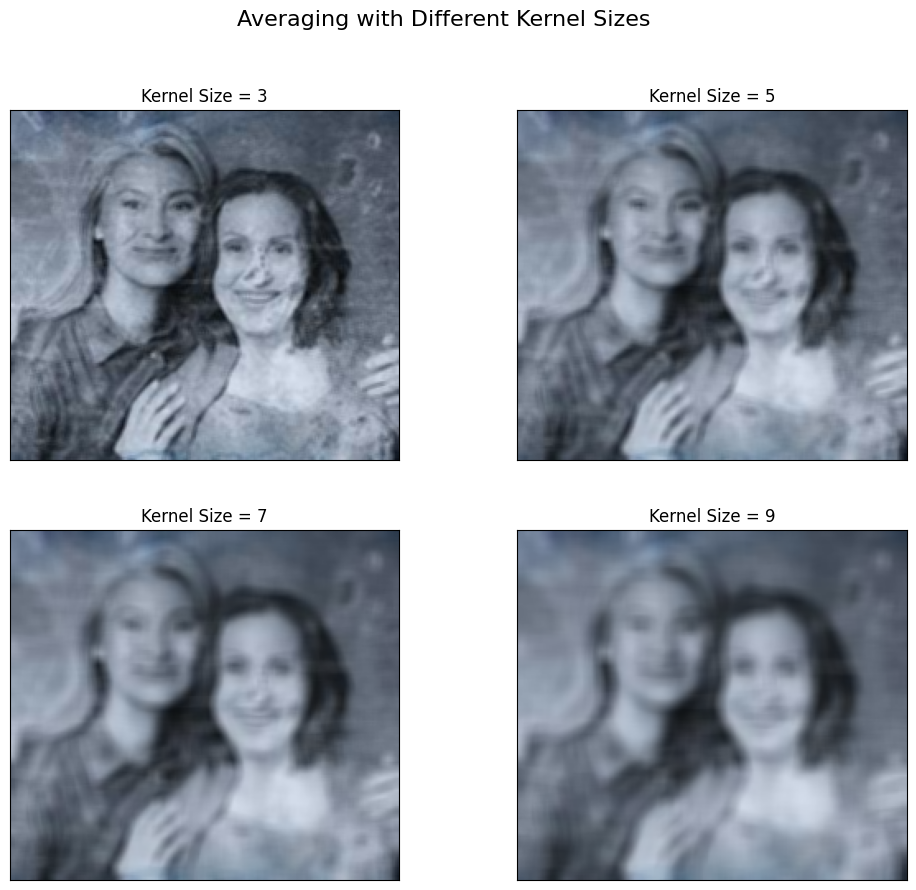

In [3]:
# --- Comparing Median Blur with different kernel sizes ---
kernel_sizes = [3, 5, 7, 9]
plt.figure(figsize=(12, 10))
plt.suptitle('Averaging with Different Kernel Sizes', fontsize=16)
for i, k in enumerate(kernel_sizes):
    blur = cv.blur(img, (k,k))
    plt.subplot(2, int(len(kernel_sizes)/2), i + 1)
    # plt.imshow(cv.cvtColor(median, cv.COLOR_BGR2RGB))
    plt.imshow(blur)
    plt.title(f'Kernel Size = {k}')
    plt.xticks([]), plt.yticks([])
plt.show()

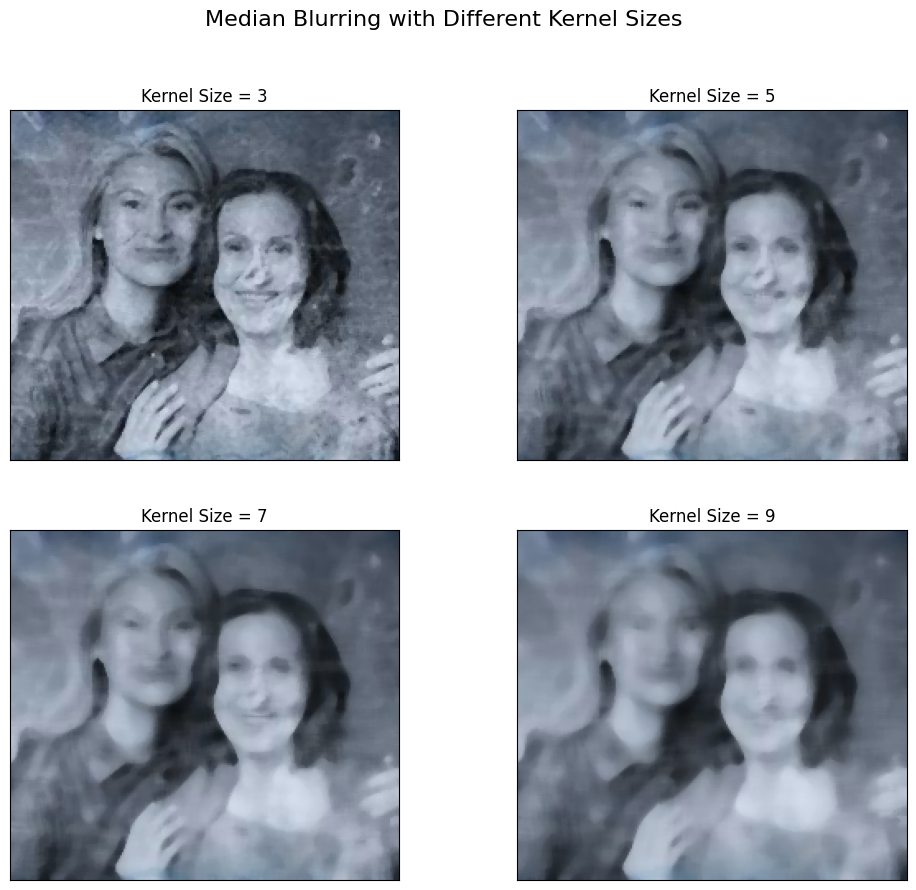

In [4]:
# --- Comparing Median Blur with different kernel sizes ---
kernel_sizes = [3, 5, 7, 9]
plt.figure(figsize=(12, 10))
plt.suptitle('Median Blurring with Different Kernel Sizes', fontsize=16)
for i, k in enumerate(kernel_sizes):
    median = cv.medianBlur(img, k)
    plt.subplot(2, int(len(kernel_sizes)/2), i + 1)
    # plt.imshow(cv.cvtColor(median, cv.COLOR_BGR2RGB))
    plt.imshow(median)
    plt.title(f'Kernel Size = {k}')
    plt.xticks([]), plt.yticks([])
plt.show()

# Gaussian Blurring: Effect of Sigma

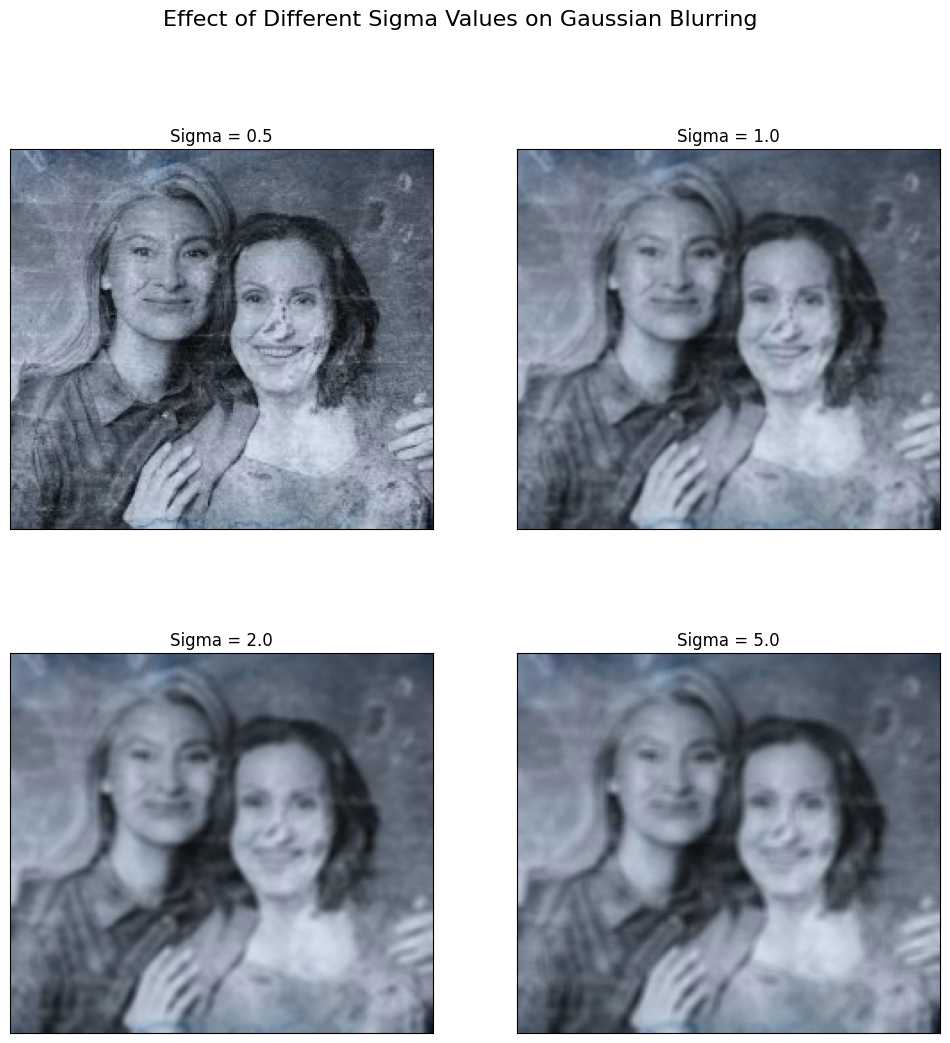

In [5]:
# --- Gaussian Blurring with different sigma values ---
# Demonstrating the effect of sigma on Gaussian Blur
sigma_values = [0.5, 1.0, 2.0, 5.0]
plt.figure(figsize=(12, 12))
plt.suptitle('Effect of Different Sigma Values on Gaussian Blurring', fontsize=16)

for i, sigma in enumerate(sigma_values):
    gaussian = cv.GaussianBlur(img, (5, 5), sigma)
    plt.subplot(2, int(len(sigma_values)/2), i + 1)
    # plt.imshow(cv.cvtColor(gaussian, cv.COLOR_BGR2RGB))
    plt.imshow(gaussian)
    plt.title(f'Sigma = {sigma}')
    plt.xticks([]), plt.yticks([])

plt.show()

## Bilateral Filtering: Effects of Parameters and Performance

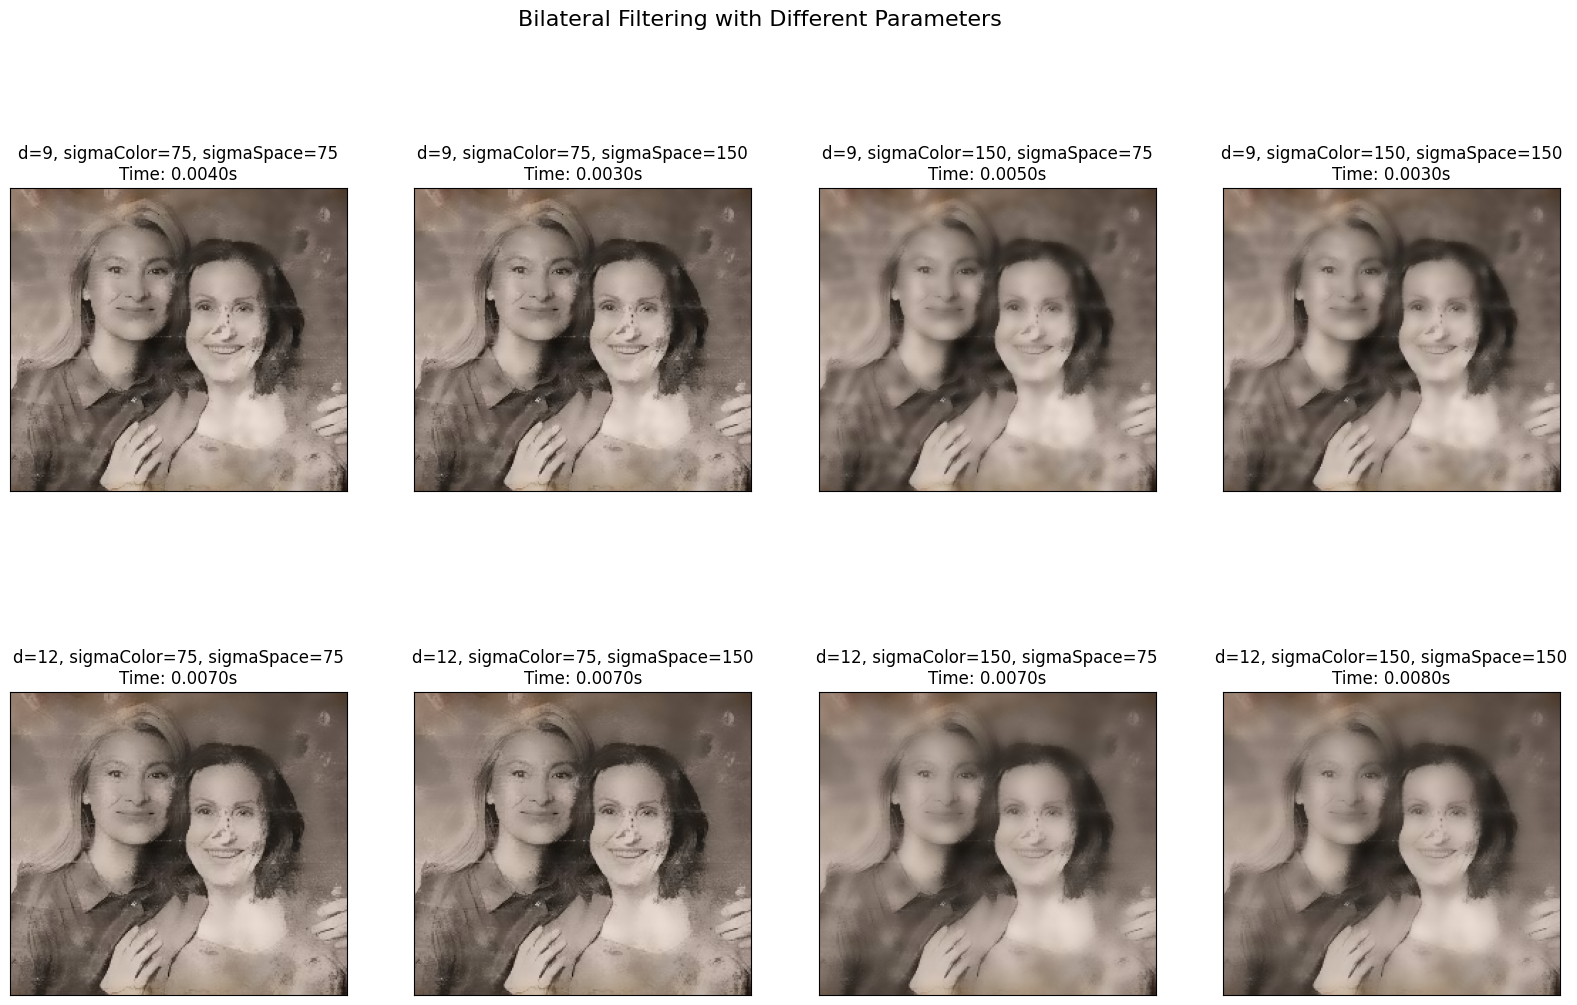

In [6]:
# --- Bilateral Filtering: Comparison of different parameters ---

import time
params = [
    (9, 75, 75),  # (d, sigmaColor, sigmaSpace)
    (9, 75, 150),
    (9, 150, 75),
    (9, 150, 150),
    (12, 75, 75),
    (12, 75, 150),
    (12, 150, 75),
    (12, 150, 150)
]

plt.figure(figsize=(20, 12))
plt.suptitle('Bilateral Filtering with Different Parameters', fontsize=16)

for i, (d, sigmaColor, sigmaSpace) in enumerate(params):
    start = time.time()
    bilateral = cv.bilateralFilter(img, d, sigmaColor, sigmaSpace)
    end = time.time()
    
    plt.subplot(2, 4, i + 1)
    plt.imshow(cv.cvtColor(bilateral, cv.COLOR_BGR2RGB))
    plt.title(f'd={d}, sigmaColor={sigmaColor}, sigmaSpace={sigmaSpace}\nTime: {end - start:.4f}s')
    plt.xticks([]), plt.yticks([])

plt.show()

## Lets introduce some noise to the image and apply the filters

### Introduce Salt and Pepper Noise

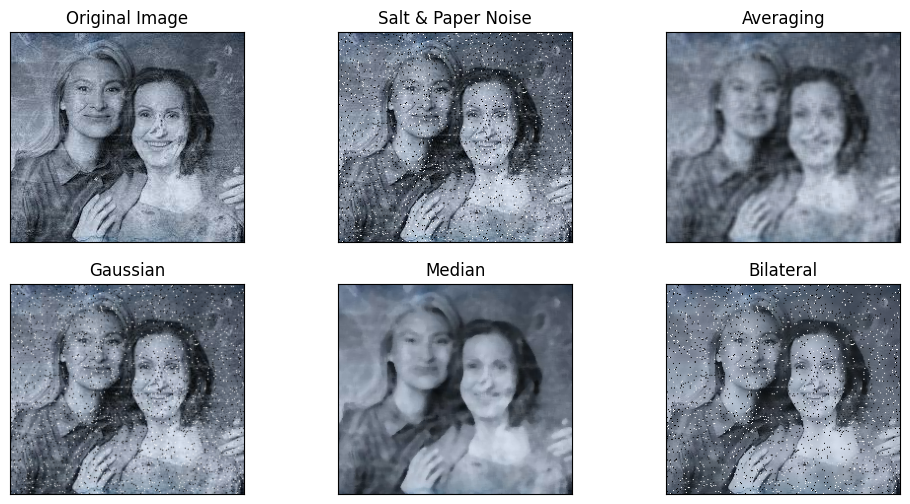

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 6))

img = cv.imread('./assets/old_image.jpg')
assert img is not None, "file could not be read, check with os.path.exists"

# Parameters for salt & pepper noise
prob = 0.05  # Probability of noise

# Create a copy of the image
noisy_image = np.copy(img)

# Apply salt & pepper noise
salt_pepper_noise = np.random.rand(*img.shape[:2])

# Salt noise (white pixels)
noisy_image[salt_pepper_noise < prob / 2] = [255, 255, 255]

# Pepper noise (black pixels)
noisy_image[salt_pepper_noise > 1 - prob / 2] = [0, 0, 0]

kernel_size = 5
blur = cv.blur(noisy_image,(kernel_size,kernel_size))
gaussian = cv.GaussianBlur(noisy_image,(kernel_size,kernel_size),0.5)
median = cv.medianBlur(noisy_image,kernel_size)
bilateral = cv.bilateralFilter(noisy_image,9,75,75)

titles = ['Original Image','Salt & Paper Noise','Averaging','Gaussian','Median','Bilateral']
images = [img, noisy_image, blur, gaussian, median, bilateral]
 
for i in range(len(titles)):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
 
plt.show()

### Introduce Gaussian Noise

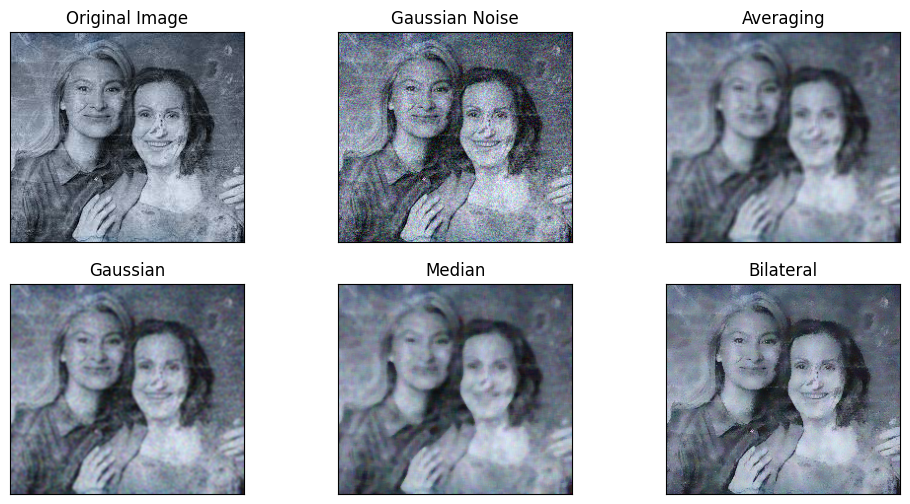

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 6))

img = cv.imread('./assets/old_image.jpg')
assert img is not None, "file could not be read, check with os.path.exists"

# Generate Gaussian noise
mean = 0
std_dev = 25
gaussian_noise = np.random.normal(mean, std_dev, img.shape)

# Convert to float to avoid overflow during the addition
image_float = img.astype(np.float32)

# Add the gaussian noise to the image
noisy_image = image_float + gaussian_noise

# Clip the values to stay between valid range [0, 255]
noisy_image = np.clip(noisy_image, 0, 255)

# Convert back to unsigned 8-bit integer
noisy_image = noisy_image.astype(np.uint8)

kernel_size = 5
blur = cv.blur(noisy_image,(kernel_size,kernel_size))
gaussian = cv.GaussianBlur(noisy_image,(kernel_size,kernel_size),0)
median = cv.medianBlur(noisy_image,kernel_size)
bilateral = cv.bilateralFilter(noisy_image,9,75,75)

titles = ['Original Image','Gaussian Noise','Averaging','Gaussian','Median','Bilateral']
images = [img, noisy_image, blur, gaussian, median, bilateral]
 
for i in range(len(titles)):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
 
plt.show()

## Filtering Assignment (10 points)
Objective: 
- Perform smoothing and sharpening filters on an image.

Task:
- Apply different types of filters (Gaussian, Median, and Laplacian) to an image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


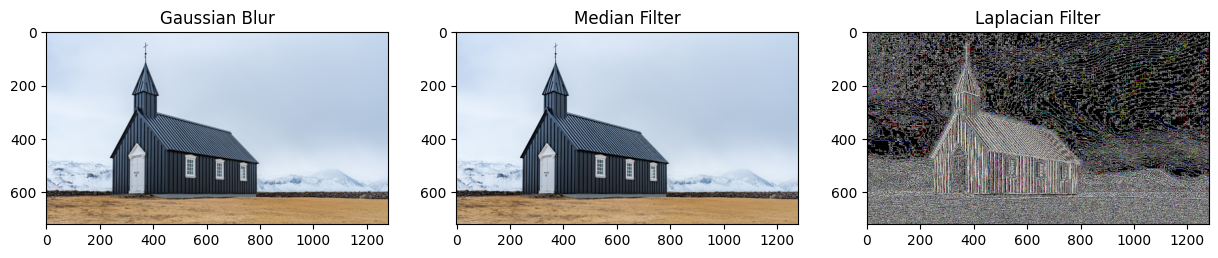

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the image
img = cv2.imread('assets/church.jpg')

# Convert the image from BGR to RGB (opencv loads in BGR format)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel_size = 3
# Step 2: Apply Gaussian Blur
blurred = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)  # Fill the kernel size

# Step 3: Apply Median Filter
median_filtered = cv2.medianBlur(img, kernel_size)  # Fill the kernel size

# Step 4: Apply Laplacian filter for sharpening
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Step 5: Visualize the results
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(blurred), plt.title('Gaussian Blur')
plt.subplot(132), plt.imshow(median_filtered), plt.title('Median Filter')
plt.subplot(133), plt.imshow(laplacian), plt.title('Laplacian Filter')
plt.show()

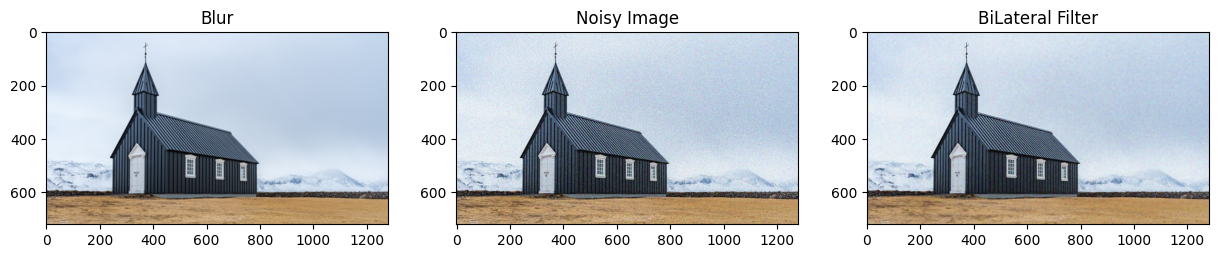

In [20]:
#Additional filters

#4 Blur
blur_img = cv.blur(img, (kernel_size, kernel_size))

#Adding noise
# Generate Gaussian noise
mean = 0
std_dev = 25
gaussian_noise = np.random.normal(mean, std_dev, img.shape)

# Convert to float to avoid overflow during the addition
image_float = img.astype(np.float32)

# Add the gaussian noise to the image
noisy_image = image_float + gaussian_noise

# Clip the values to stay between valid range [0, 255]
noisy_image = np.clip(noisy_image, 0, 255)

# Convert back to unsigned 8-bit integer
noisy_image = noisy_image.astype(np.uint8)

#biLateral filter
bilateral = cv.bilateralFilter(noisy_image,9,75,75)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(blur_img), plt.title('Blur')
plt.subplot(132), plt.imshow(noisy_image), plt.title('Noisy Image')
plt.subplot(133), plt.imshow(bilateral), plt.title('BiLateral Filter')
plt.show()